In [ ]:
import wget
#wget.download('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIPNI/COVID/uf/uf%3DGO/part-00000-3b664362-3218-4bfa-8e3d-6891f24929be.c000.csv', './files')
wget.download('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/LEITOS/2022-06-17/esus-vepi.LeitoOcupacao_2022.csv' , './files')

In [ ]:
#pip install pandas
#pip install seaborn
#pip install pandas

In [2]:
# Importando Pacote PANDAS
import pandas as pd
import numpy as np

# Importando Pacote SEABORN
import seaborn as sns
sns.set()

In [3]:
df_vacinacao = pd.read_csv('./files/part-00000-3b664362-3218-4bfa-8e3d-6891f24929be.c000.csv', sep=';')
df_leitos = pd.read_csv('./files/esus-vepi.LeitoOcupacao_2022.csv', sep=',')

C:\Users\vinic\AppData\Local\Temp\ipykernel_14096\1986946205.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vacinacao = pd.read_csv('./files/part-00000-3b664362-3218-4bfa-8e3d-6891f24929be.c000.csv', sep=';')


In [81]:
#Vacinação
#Total de vacinados no estado:
total_doses = df_vacinacao.filter(['vacina_descricao_dose', 'estabelecimento_municipio_nome']).groupby('vacina_descricao_dose').count()
total_doses



,estabelecimento_municipio_nome
vacina_descricao_dose,
1ª Dose,1925978
1ª Dose Revacinação,1
2ª Dose,1668293
2º Reforço,137494
3ª Dose,1
3º Reforço,127
Dose,54226
Dose Adicional,58558
Dose Inicial,1


In [82]:
#cidade com menor indice de vacinação:

data_to_citys = df_vacinacao.filter(items=['estabelecimento_municipio_nome','vacina_descricao_dose']).groupby('estabelecimento_municipio_nome')['vacina_descricao_dose'].count()
# data_to_citys = pd.DataFrame(data_to_citys) 


minimumValue = {'Municipio': data_to_citys.idxmin(), 'Numero_de_doses': [data_to_citys.min()]}

minimumValue = pd.DataFrame(data= minimumValue)
minimumValue

,Municipio,Numero_de_doses
0,ANHANGUERA,993


In [83]:
#Cidade com menor indice de vacinação:

data_to_citys = df_vacinacao.filter(items=['estabelecimento_municipio_nome','vacina_descricao_dose']).groupby('estabelecimento_municipio_nome')['vacina_descricao_dose'].count()
# data_to_citys = pd.DataFrame(data_to_citys) 


maximumValue = {'Municipio': data_to_citys.idxmax(), 'Numero_de_doses': [data_to_citys.max()]}

maximumValue = pd.DataFrame(data= maximumValue)
maximumValue

,Municipio,Numero_de_doses
0,GOIANIA,1050293


In [73]:
##Ocupação de leitos
## O Dia com maior ocupação hospitalar por COVID-19 no estado

ocupGoias = df_leitos.query('estado == "Goiás"')
ocupGoias['dataNotificacao'] = ocupGoias['dataNotificacao'].astype('datetime64[ns]')
dayMoreCases = ocupGoias.groupby([ocupGoias['dataNotificacao'].dt.date]).mean()
dayMoreCases  = dayMoreCases[dayMoreCases['ocupacaoCovidUti'] ==  dayMoreCases['ocupacaoCovidUti'].max()] 
dayMoreCases

C:\Users\vinic\AppData\Local\Temp\ipykernel_14096\3933540659.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocupGoias['dataNotificacao'] = ocupGoias['dataNotificacao'].astype('datetime64[ns]')


,Unnamed: 0,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,ocupacaoHospitalarUti,ocupacaoHospitalarCli,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,excluido,validado
dataNotificacao,,,,,,,,,,,,,,,
2022-05-15,1477091.75,NaN,NaN,NaN,NaN,5.25,0.25,7.25,28.25,0.0,0.0,0.25,0.0,0.0,0.0


In [74]:
## Ocupação de leitos
##  Cidade com mais índice de ocupação

agroupCity = ocupGoias.groupby('municipio').mean();

cityWithMoreOcupation =agroupCity[agroupCity['ocupacaoCovidUti'] == agroupCity['ocupacaoCovidUti'].max()] 
cityWithMoreOcupation

,Unnamed: 0,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,ocupacaoHospitalarUti,ocupacaoHospitalarCli,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,excluido,validado
municipio,,,,,,,,,,,,,,,
Nerópolis,1.405581e+06,NaN,NaN,NaN,NaN,15.12037,3.712963,41.916667,13.583333,8.0,6.037037,443.611111,688.583333,0.0,0.0


In [72]:
## Ocupação de leitos
##  Cidade com menor índice de ocupação

agroupCity = ocupGoias.groupby('municipio').mean();

cityWithLowerOcupation =agroupCity[agroupCity['ocupacaoCovidUti'] == agroupCity['ocupacaoCovidUti'].loc[agroupCity['ocupacaoCovidUti'] != 0].min()] 
cityWithLowerOcupation 

,Unnamed: 0,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,ocupacaoHospitalarUti,ocupacaoHospitalarCli,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,excluido,validado
municipio,,,,,,,,,,,,,,,
Goiatuba,1.394592e+06,NaN,NaN,NaN,NaN,0.002591,0.173575,0.031088,4.841969,0.031088,1.305699,0.002591,0.031088,0.0,0.0


<AxesSubplot:xlabel='dataNotificacao'>

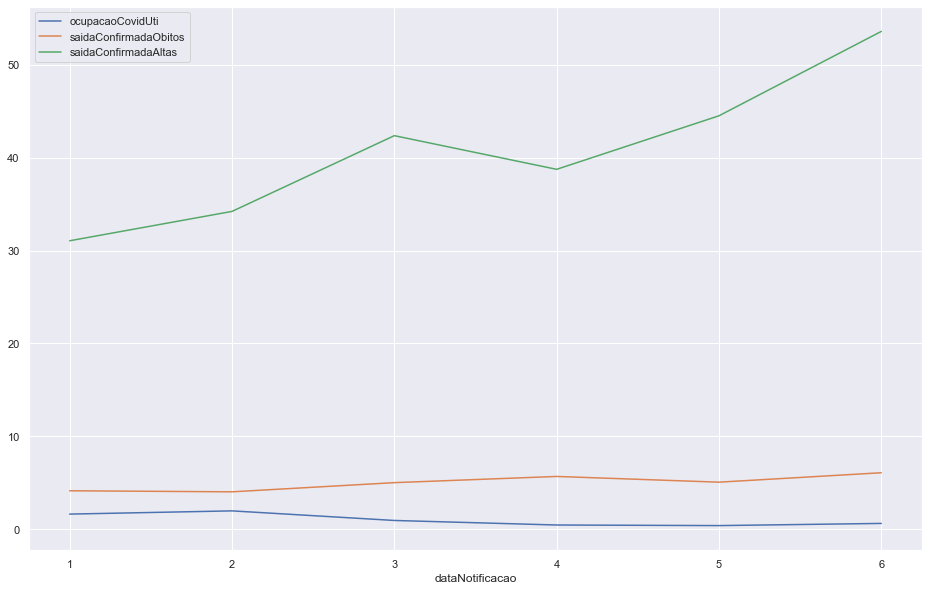

In [111]:
#Relatório 
groupDate = ocupGoias.groupby([ocupGoias['dataNotificacao'].dt.month]).mean()

groupDate.filter(['ocupacaoCovidUti','saidaConfirmadaObitos', 'saidaConfirmadaAltas']).plot(figsize= (16,10))